# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

Task is to examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

# Importing requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
## checking the shape
df.shape

(7043, 21)

1-We have 7043 rows and 21 attributes including our target attribute.

2-Churn us our target attribute

In [4]:
## Checking datatype
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total Charges should be float datatype but iyt shows as object datatype. We need to insepect and correct it.

In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
## Checking null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 null values in Toatl Charges column.

# Statistical Summary

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Obseravtion

1-Total Charges is right skewed and it conatain outliers because the difference between 3rd quantile and max values is very high.

2-Monthly charges is little left skewed because mean is greater than median here.

In [8]:
#imputing missing values
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

<AxesSubplot:title={'center':'Missing Values Heatmap'}>

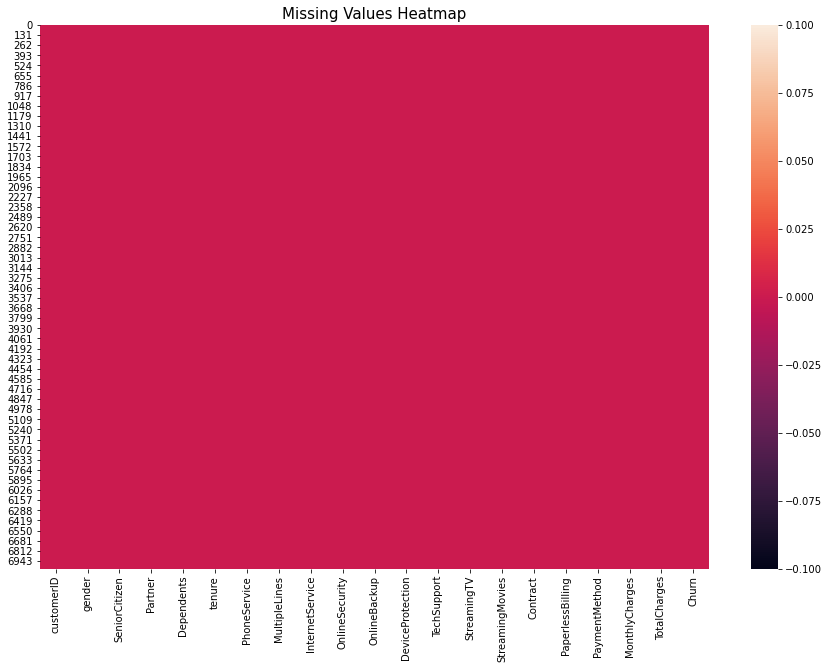

In [9]:
## Again checking null values
plt.figure(figsize=(15,10))
plt.title('Missing Values Heatmap',fontsize=15)
sns.heatmap(df.isnull())

Now there is no missing values present in our dataset.

In [10]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [11]:
## MAking a group of tenure based of a Year
Labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]

df['tenure_group']=pd.cut(df['tenure'],range(1,80,12),right=False,labels=Labels)

In [12]:
## Dropping unnecessary columns
df=df.drop(['tenure','customerID'],axis=1)

In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Visualization

In [17]:
do=df.select_dtypes(include='object')
for i in do:
    print('---------------',i,'-----------------------')
    print(df[i].value_counts())

--------------- gender -----------------------
Male      3555
Female    3488
Name: gender, dtype: int64
--------------- Partner -----------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------- Dependents -----------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------- PhoneService -----------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------- MultipleLines -----------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------- InternetService -----------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------- OnlineSecurity -----------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
--------------- OnlineBackup -----------------------
No                     3088
Yes       

In [32]:
def uni(df,col):
    plt.figure(figsize=(12,8))
    plt.title(col+ ' Vs Churn',fontsize=18)
    sns.countplot(df[col],hue='Churn',data=df)

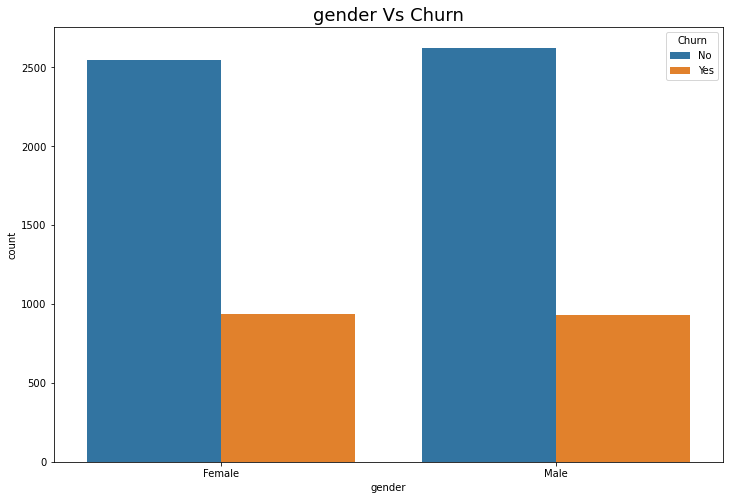

In [33]:
uni(df,'gender')

There is approximatly similar ratio for churners and non-churners.

In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

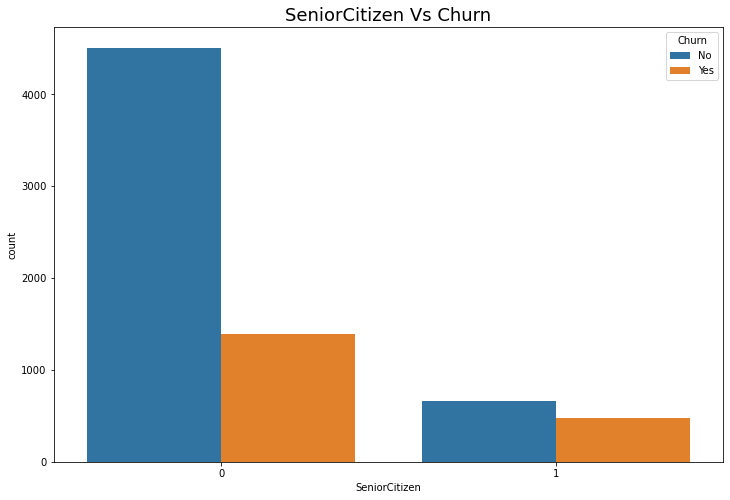

In [35]:
uni(df,'SeniorCitizen')

On the basis of ratio we can see that senior citizens are more churners then other age group.

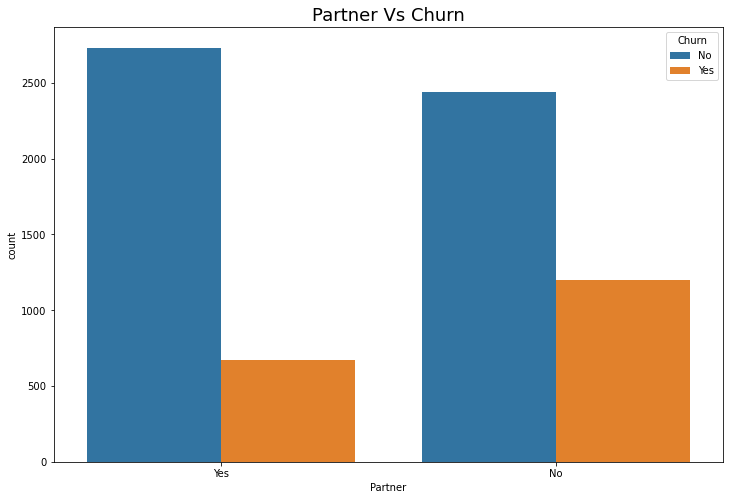

In [36]:
uni(df,'Partner')

Single people are more likly to switch to different network as compared to people who are married/non single.

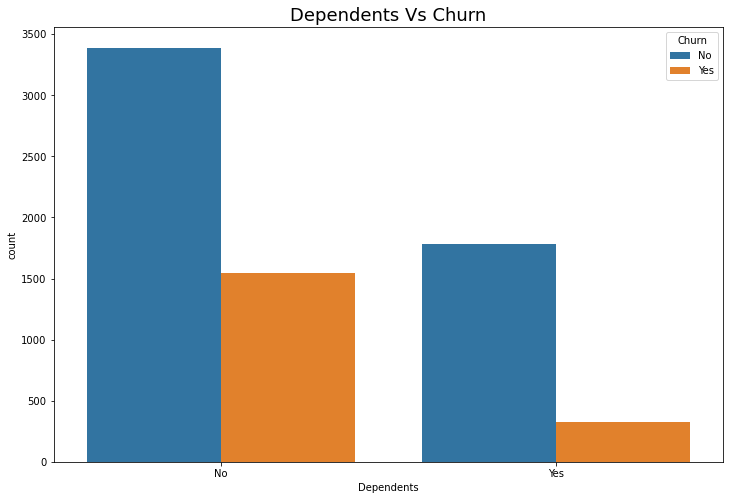

In [37]:
uni(df,'Dependents')

People who has no dependents seems more to switch to different network.

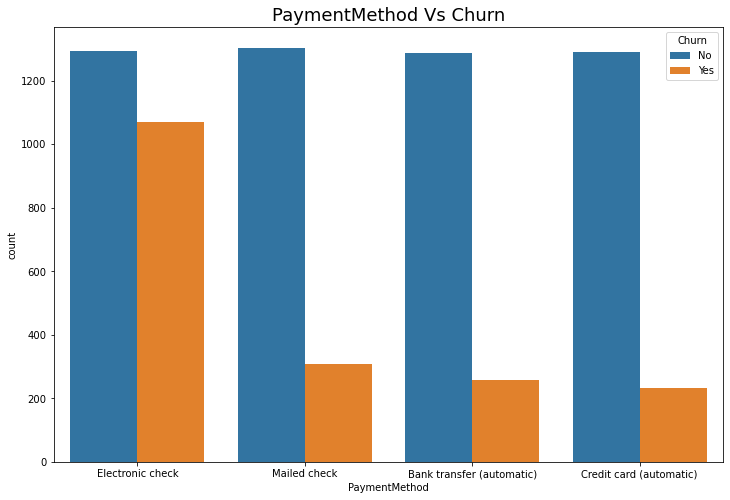

In [38]:
uni(df,'PaymentMethod')

People who are using Elctronic Check for payment method usually churn more than people using credit card/bank transfer/mailed check.

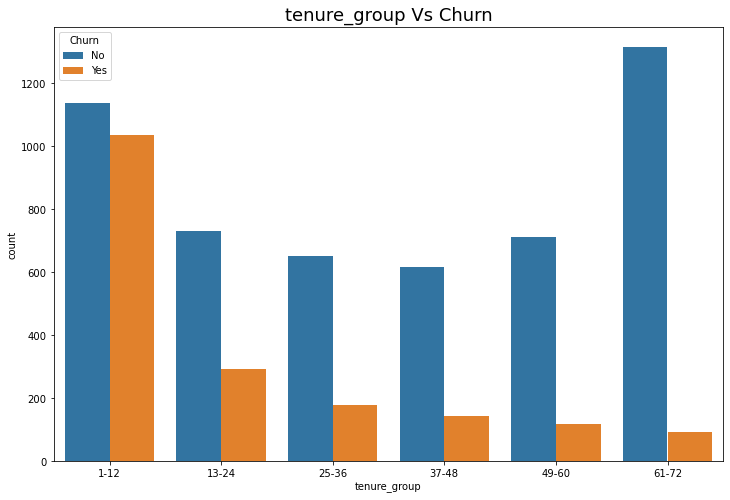

In [39]:
uni(df,'tenure_group')

Here we can find a surprising fact that people who are new to network and fall under tenure group of 1-12 months have highest chances to churn wheras people who are using network for a very long time they are more loyal to company and has lowest chances to churn from network.

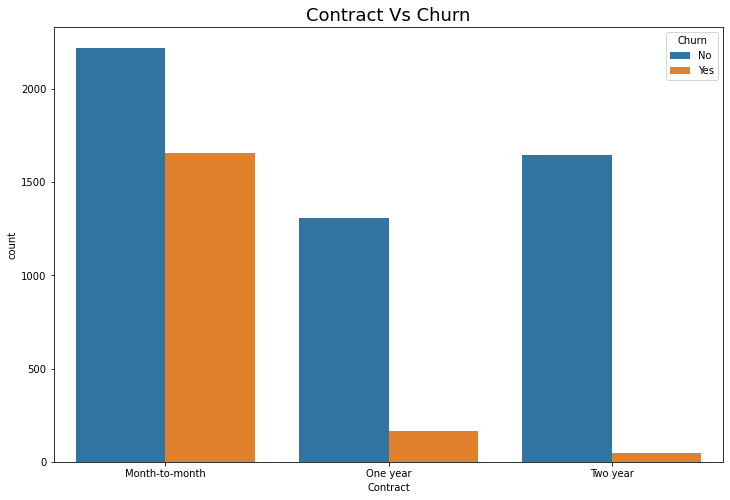

In [40]:
uni(df,'Contract')

Another surprising fact we can see that people who avail a month to month contract has the highest chances to churn where as people who has contract for year/two year has least chances to churn.

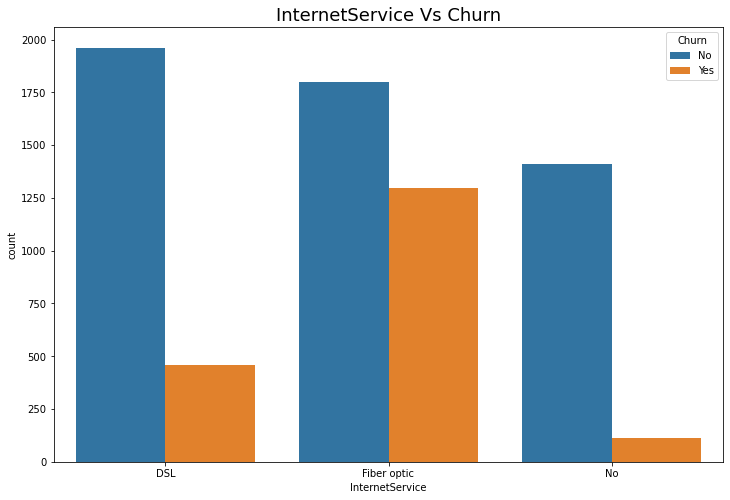

In [41]:
uni(df,'InternetService')

People who are using Fiber optics/advance technology churn more than others.

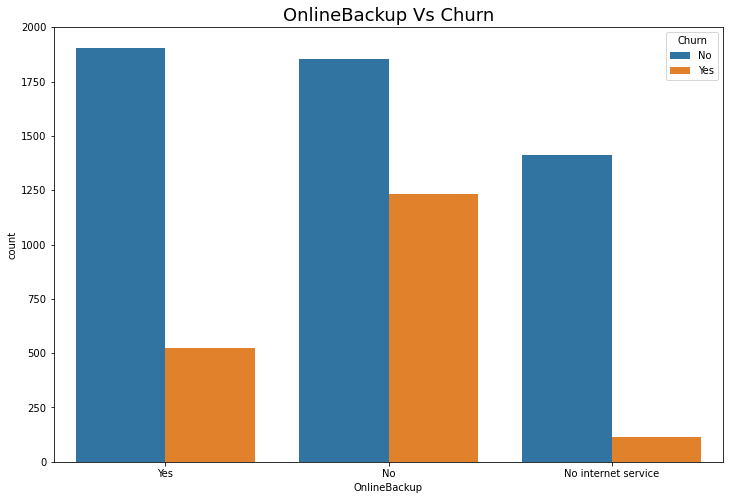

In [42]:
uni(df,'OnlineBackup')

People who has no online backup support churn more. People who has no internet services generally churn least. 

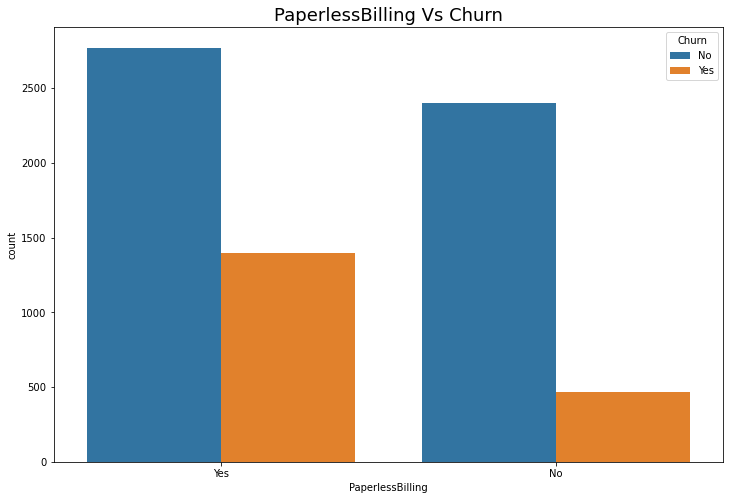

In [43]:
uni(df,'PaperlessBilling')

People who are using online mode for billing and get the billing paper online/mail/pdf are generally churners.

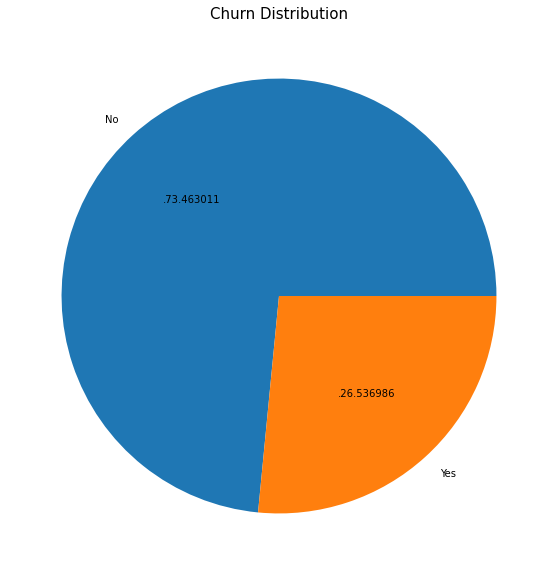

In [89]:
plt.figure(figsize=(20,10))
plt.title('Churn Distribution',fontsize=15)
x=df['Churn'].value_counts().to_list()
labels = ['No','Yes']
plt.pie(x, labels = labels,autopct='.%1f')
plt.show()

We can see that most of person fall under non churners in our dataset. By looking on that we can say that our data is biased.

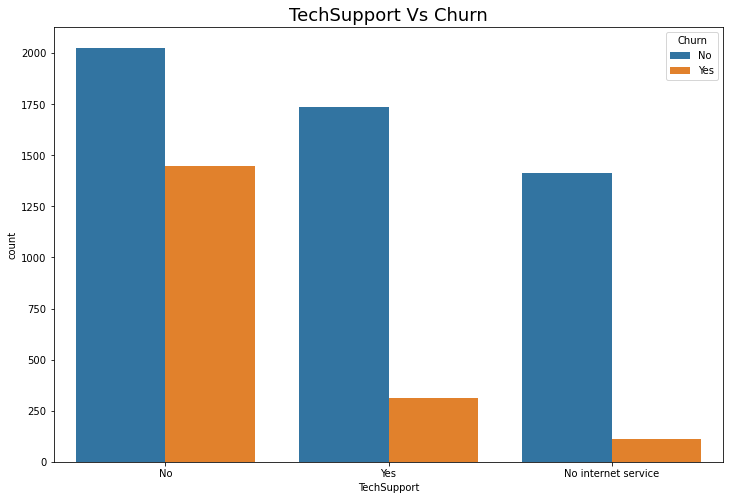

In [103]:
uni(df,'TechSupport')

We can see that people who use tech support generally non churners but but who don't use tech support most likly to switch to other network.

<AxesSubplot:title={'center':'Monthly Charges Vs Total Charges'}, xlabel='MonthlyCharges', ylabel='TotalCharges'>

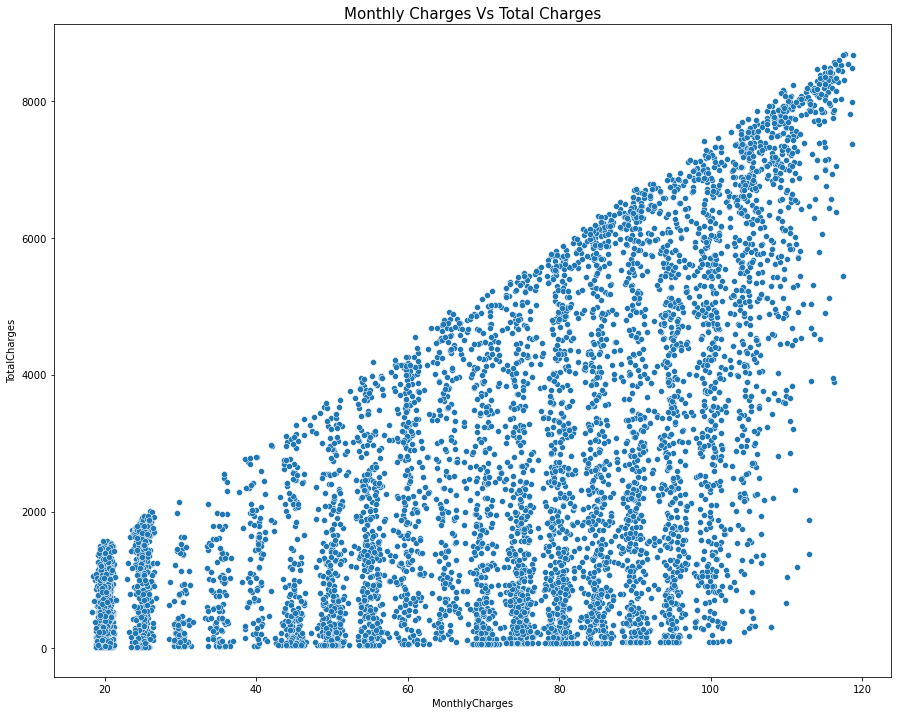

In [107]:
plt.figure(figsize=(15,12))
plt.title('Monthly Charges Vs Total Charges',fontsize=15)
sns.scatterplot(df['MonthlyCharges'],df['TotalCharges'])

There is a clear linear relationship between Monthly charges and Total Charges.

<Figure size 1080x720 with 0 Axes>

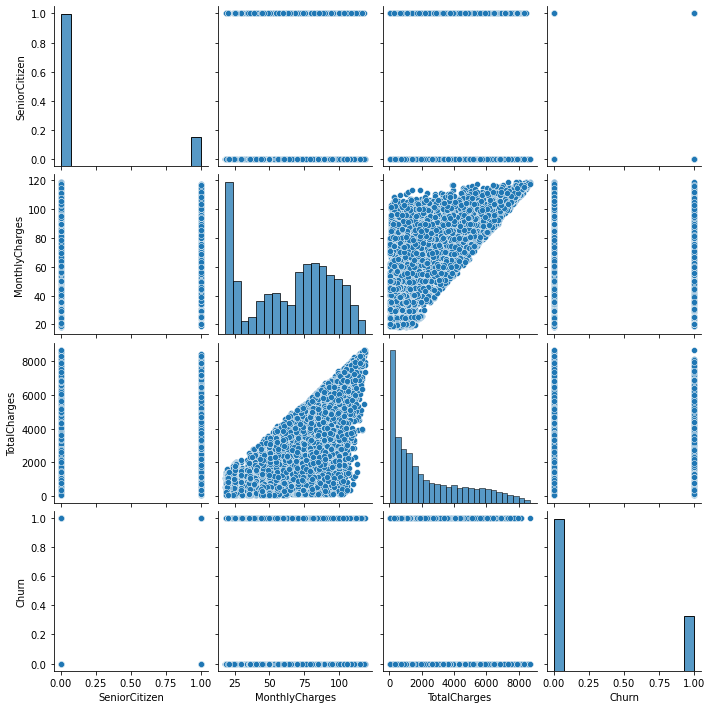

In [112]:
plt.figure(figsize=(15,10))
sns.pairplot(df)

# Distribution

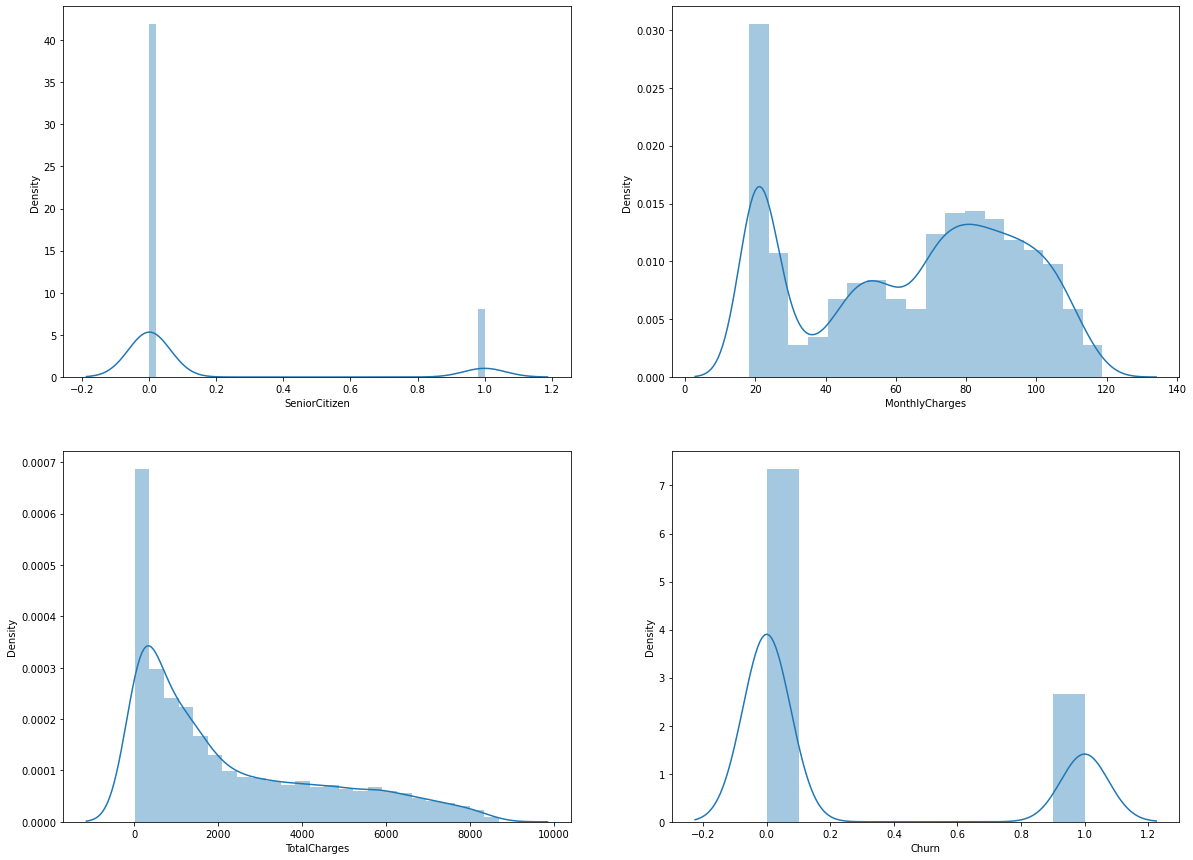

In [116]:
df_n=df.select_dtypes(exclude='object')
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=4:
        plt.subplot(2,2,plot)
        sns.distplot(df[i])
        plot=plot+1

1-We could see that Total Charges is right skewed. we need to fix this.

2-Monthly charges also not in bell shape so we can perform some transformation technique to change it into normal distribution form


# Oulliers 

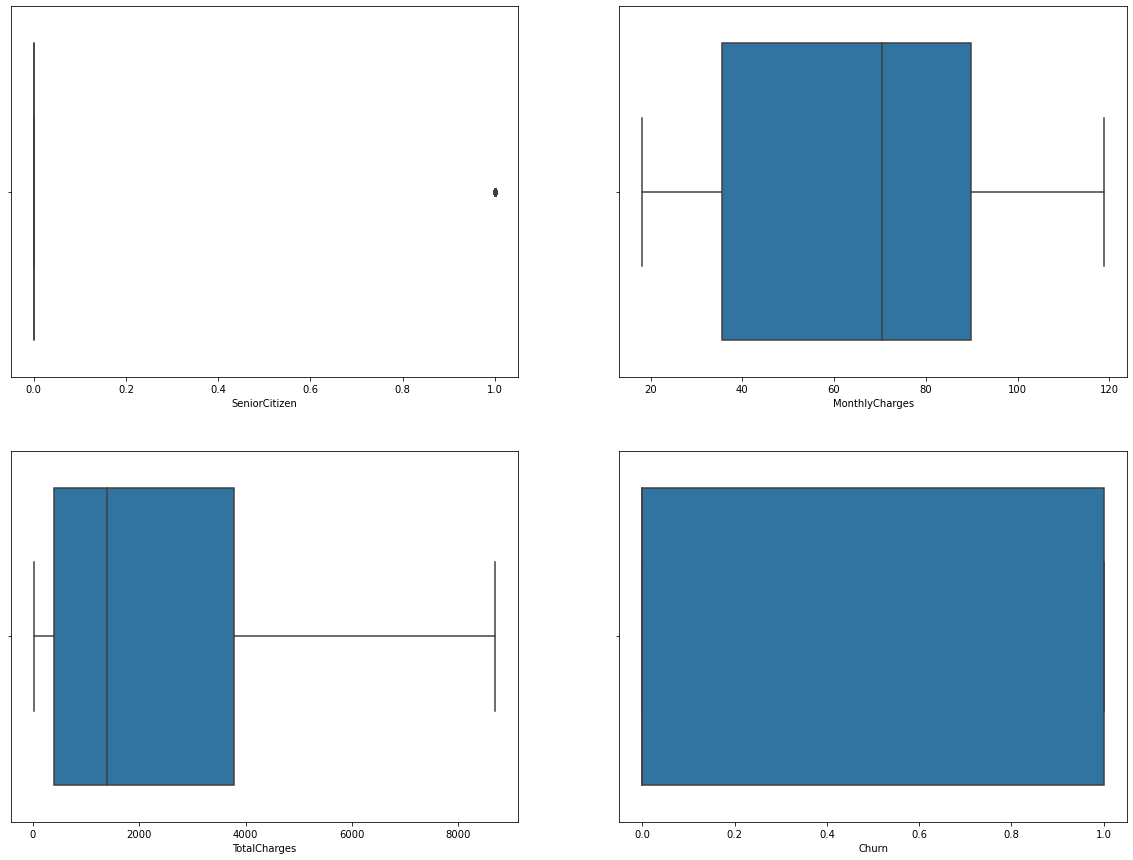

In [117]:
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=4:
        plt.subplot(2,2,plot)
        sns.boxplot(df[i])
        plot=plot+1

There is no outliers present in our dataset.

# Skewness

In [118]:
df_1=df.copy()

In [119]:
df_1.skew()

SeniorCitizen     1.833633
MonthlyCharges   -0.220524
TotalCharges      0.963789
Churn             1.063031
dtype: float64

In [120]:
df_1['TotalCharges']=np.cbrt(df['TotalCharges'])

In [121]:
df_1.skew()

SeniorCitizen     1.833633
MonthlyCharges   -0.220524
TotalCharges      0.012996
Churn             1.063031
dtype: float64

We have remove skewness to possible extent. Now data points are not skew.

# Label Encoding

In [110]:
## Encoding of our Target Attribute
df['Churn']=df['Churn'].replace({'No':0,'Yes':1})

In [122]:
df_1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,3.102045,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,12.362766,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,4.764407,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,12.255516,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,5.332704,1,1-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,12.579230,0,13-24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,19.454331,0,61-72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,7.023391,0,1-12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,6.743066,1,1-12


In [123]:
df_1=pd.get_dummies(df_1,drop_first=True)

In [124]:
df_1

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,3.102045,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,56.95,12.362766,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,0,53.85,4.764407,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,42.30,12.255516,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,70.70,5.332704,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,12.579230,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0
7039,0,103.20,19.454331,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1
7040,0,29.60,7.023391,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7041,1,74.40,6.743066,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


# Correlation Plot

In [128]:
## Correlation with Target
df_1.corr()['Churn']

SeniorCitizen                            0.150889
MonthlyCharges                           0.193356
TotalCharges                            -0.233425
Churn                                    1.000000
gender_Male                             -0.008612
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
PhoneService_Yes                         0.011942
MultipleLines_No phone service          -0.011942
MultipleLines_Yes                        0.040102
InternetService_Fiber optic              0.308020
InternetService_No                      -0.227890
OnlineSecurity_No internet service      -0.227890
OnlineSecurity_Yes                      -0.171226
OnlineBackup_No internet service        -0.227890
OnlineBackup_Yes                        -0.082255
DeviceProtection_No internet service    -0.227890
DeviceProtection_Yes                    -0.066160
TechSupport_No internet service         -0.227890
TechSupport_Yes                         -0.164674


<AxesSubplot:title={'center':'Correlation with Churn'}>

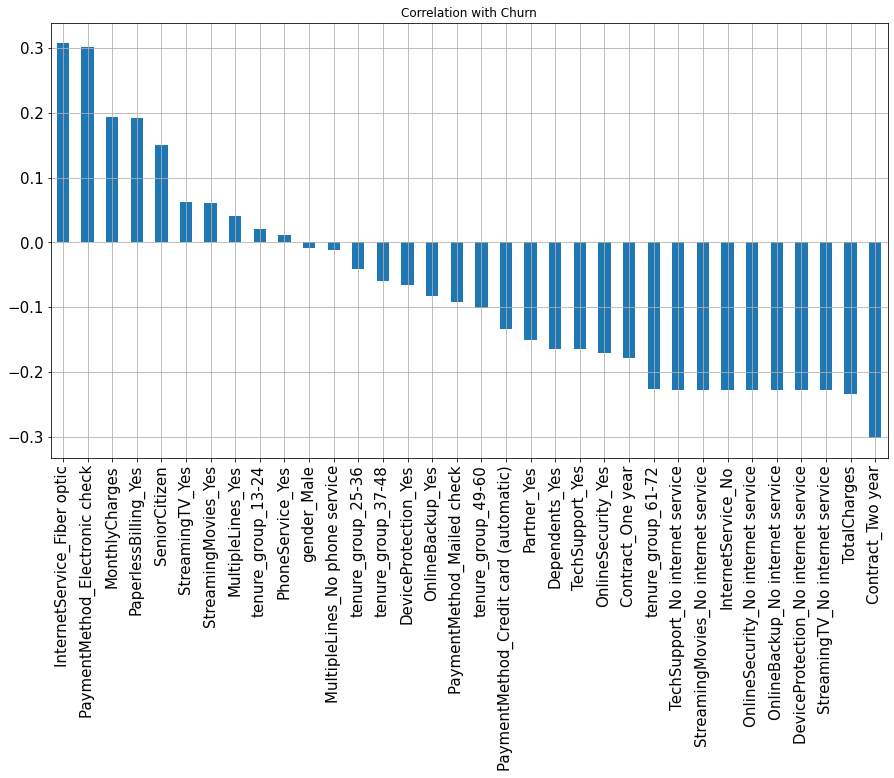

In [127]:
df_1.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot.bar(figsize=(15,8),grid=True,title='Correlation with Churn',fontsize=15)

1-We could see that neither very strong nor  very weak correlation exists with the target attribute.

2-Phone service and Gender have almost zero correlation.

3-Most of attributes are negativly correlated with our target attribute.


<AxesSubplot:>

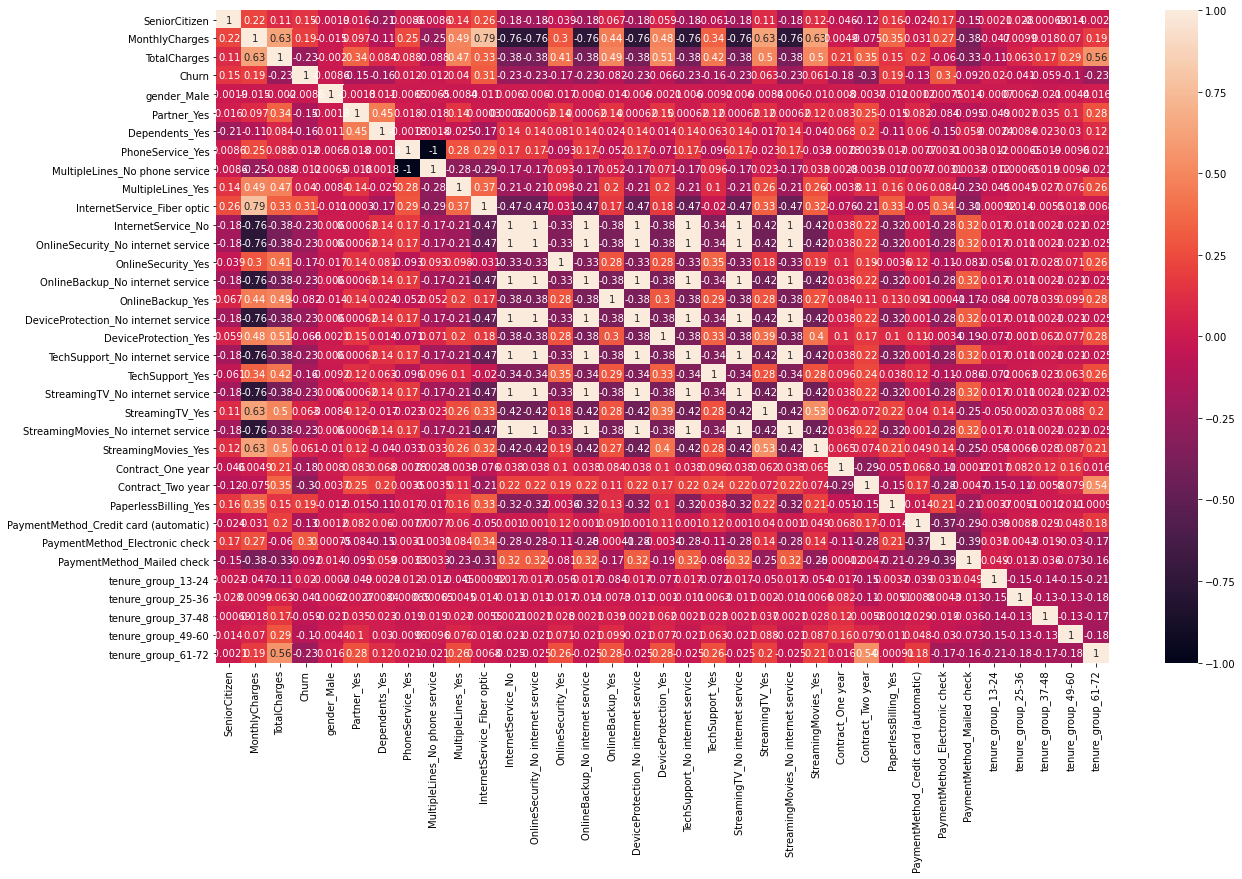

In [132]:
## Correlation Heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df_1.corr(),annot=True)

1-Monthly charges and Total Charges are highly postively correlated.

2-Some of transformed(encoded) attributes  shows a perfect correlation with other attributes.

3-Overall there is no such a very strong positive or negative correlation exist bewteen attributes. 

# Split the data in X and Y

In [133]:
x=df_1.drop(['Churn'],axis=1)
y=df_1[['Churn']]

In [134]:
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,3.102045,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,56.95,12.362766,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,0,53.85,4.764407,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,42.30,12.255516,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,70.70,5.332704,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,12.579230,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0
7039,0,103.20,19.454331,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1
7040,0,29.60,7.023391,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7041,1,74.40,6.743066,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [135]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


# Feature Importance

[0.02601979 0.14847296 0.18920634 0.0384169  0.03200351 0.02515091
 0.00466756 0.00485628 0.02669155 0.04323874 0.00850391 0.00599767
 0.02976439 0.0056468  0.02841026 0.00462961 0.02596423 0.00565799
 0.03145308 0.00443854 0.02443885 0.00326546 0.02459457 0.03323823
 0.04405562 0.03138802 0.01785772 0.03983404 0.01392474 0.01921398
 0.01440413 0.01268402 0.01244979 0.01945982]


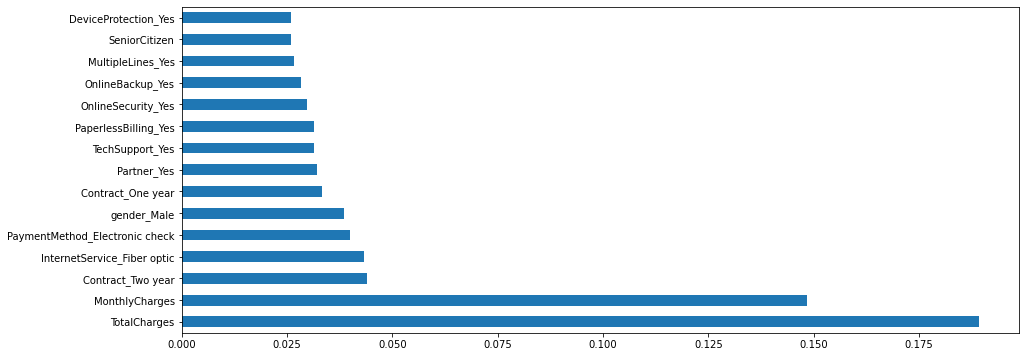

In [136]:
from sklearn.ensemble import ExtraTreesClassifier
selection=ExtraTreesClassifier()
selection.fit(x,y)
##use inbuilt class feature_importances of tree based classifiers
print(selection.feature_importances_)
# for plotting
plt.figure(figsize=(15,6))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

1-We could see Total Charges,Monthly Charges and Contract for 2 years are top 3 most important features to predict the churn in our dataset.


# Model Buidling

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.combine import SMOTEENN

In [155]:
## Over sampling our data
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [158]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(X_resampled1,y_resampled1,test_size=.20,random_state=i,stratify=y_resampled1)
    ##over sampling of our Data
       # print(x_train.shape,y_train.shape) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

max accuracy score corresponding to 78 is 0.9477503628447025


cross validation score 0.8053400622620813


Standard Deviation 0.00802686387531114


F1 score 0.9459783913565426


Training accuracy 0.9313850063532402


Test Accuracy 0.9346879535558781


Confusion Matrix [[500  50]
 [ 40 788]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.91      0.92       550
           1       0.94      0.95      0.95       828

    accuracy                           0.93      1378
   macro avg       0.93      0.93      0.93      1378
weighted avg       0.93      0.93      0.93      1378



Roc_auc Score 0.9303908651734738





78

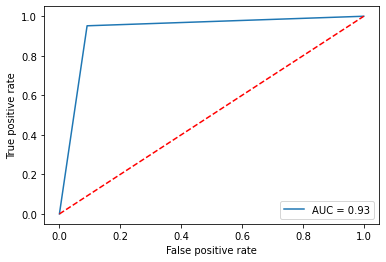

In [159]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

max accuracy score corresponding to 99 is 0.9448476052249637


cross validation score 0.7222750258081165


Standard Deviation 0.013275320016589785


F1 score 0.9544364508393286


Training accuracy 1.0


Test Accuracy 0.9448476052249637


Confusion Matrix [[506  44]
 [ 32 796]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.92      0.93       550
           1       0.95      0.96      0.95       828

    accuracy                           0.94      1378
   macro avg       0.94      0.94      0.94      1378
weighted avg       0.94      0.94      0.94      1378



Roc_auc Score 0.9406763285024154





99

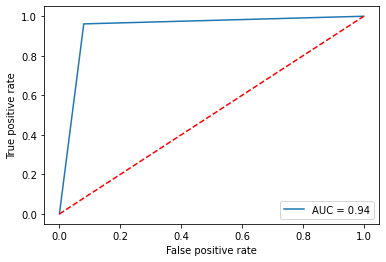

In [160]:
## DEcision Tree
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max accuracy score corresponding to 74 is 0.969521044992743


cross validation score 0.7726834190915544


Standard Deviation 0.010082327798951416


F1 score 0.9664113140836771


Training accuracy 0.9727718279179525


Test Accuracy 0.9586357039187228


Confusion Matrix [[501  49]
 [  8 820]]


Classification Report               precision    recall  f1-score   support

           0       0.98      0.91      0.95       550
           1       0.94      0.99      0.97       828

    accuracy                           0.96      1378
   macro avg       0.96      0.95      0.96      1378
weighted avg       0.96      0.96      0.96      1378



Roc_auc Score 0.9506236275801493





74

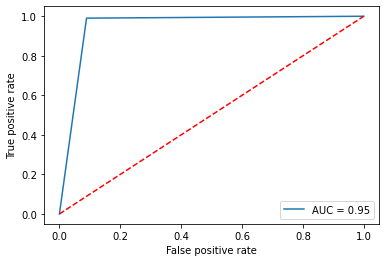

In [161]:
## KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max accuracy score corresponding to 78 is 0.9201741654571843


cross validation score 0.6766984966772049


Standard Deviation 0.008892866097620815


F1 score 0.927810650887574


Training accuracy 0.9048829188600472


Test Accuracy 0.9114658925979681


Confusion Matrix [[472  78]
 [ 44 784]]


Classification Report               precision    recall  f1-score   support

           0       0.91      0.86      0.89       550
           1       0.91      0.95      0.93       828

    accuracy                           0.91      1378
   macro avg       0.91      0.90      0.91      1378
weighted avg       0.91      0.91      0.91      1378



Roc_auc Score 0.9025208607817303





78

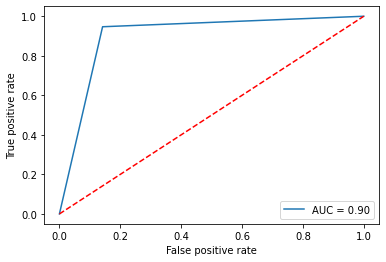

In [162]:
##Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max accuracy score corresponding to 78 is 0.9731494920174165


cross validation score 0.7860293406026195


Standard Deviation 0.012044640701167796


F1 score 0.9688249400479616


Training accuracy 1.0


Test Accuracy 0.9622641509433962


Confusion Matrix [[518  32]
 [ 20 808]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.94      0.95       550
           1       0.96      0.98      0.97       828

    accuracy                           0.96      1378
   macro avg       0.96      0.96      0.96      1378
weighted avg       0.96      0.96      0.96      1378



Roc_auc Score 0.9588317962231006





78

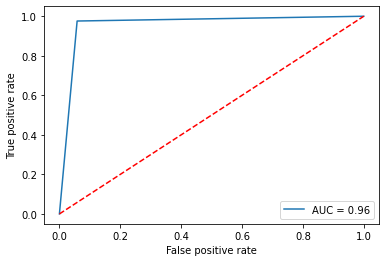

In [163]:
#Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max accuracy score corresponding to 78 is 0.9470246734397678


cross validation score 0.8027830424543518


Standard Deviation 0.00944887895307258


F1 score 0.9405469678953627


Training accuracy 0.9332002178253767


Test Accuracy 0.9274310595065312


Confusion Matrix [[487  63]
 [ 37 791]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.89      0.91       550
           1       0.93      0.96      0.94       828

    accuracy                           0.93      1378
   macro avg       0.93      0.92      0.92      1378
weighted avg       0.93      0.93      0.93      1378



Roc_auc Score 0.9203842775581906





78

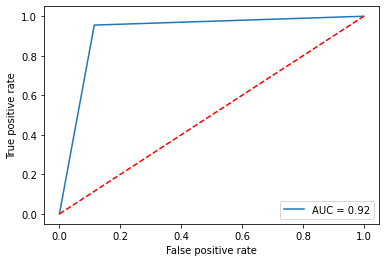

In [164]:
## adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max accuracy score corresponding to 78 is 0.95355587808418


cross validation score 0.804771477192077


Standard Deviation 0.006760747736818628


F1 score 0.9526662672258839


Training accuracy 0.9533490651660919


Test Accuracy 0.9426705370101597


Confusion Matrix [[504  46]
 [ 33 795]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.92      0.93       550
           1       0.95      0.96      0.95       828

    accuracy                           0.94      1378
   macro avg       0.94      0.94      0.94      1378
weighted avg       0.94      0.94      0.94      1378



Roc_auc Score 0.9382542819499342





78

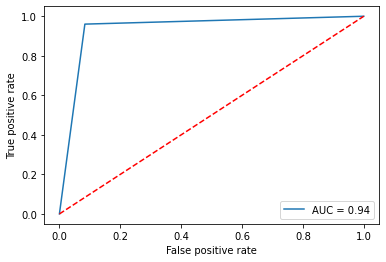

In [165]:
## Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

In [166]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','KNN','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
                         'Accuracy Score':[94.77,94.48,96.95,92.01,97.31,94.7,95.355],
                         'F1_Score':[94.59,95.44,96.41,92.88,96.88,94.05,95.266],
                         'Cross_validation':[80.53,72.22,77.26,67.66,78.6,80.27,80.47]})
best_model

,Model,Accuracy Score,F1_Score,Cross_validation
0,LogisticRegression,94.770,94.590,80.53
1,DecisionTreeClassifier,94.480,95.440,72.22
2,KNN,96.950,96.410,77.26
3,GaussianNB,92.010,92.880,67.66
4,RandomForestClassifier,97.310,96.880,78.60
5,AdaBoostClassifier,94.700,94.050,80.27
6,GradientBoostingClassifier,95.355,95.266,80.47


We could see that Logistic Regression is our best model among all because it givers us a very good accuracy & f 1 score with least difference with cross validation score so we will Logistic regression as our best model

# Hyperparameter Tuning

In [167]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=78,test_size=.20,stratify=y_resampled)
lg_1=LogisticRegression()
param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lg_1,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}

In [168]:
lg_final=LogisticRegression(C=10,max_iter=200,penalty='l1',solver='liblinear')
lg_final.fit(x_train,y_train)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))


Final Accuracy_score : 0.9267935578330894


Final f_1 score : 0.9401197604790419


Final roc_auc score : 0.9248015401166412


Final classification Report :               precision    recall  f1-score   support

           0       0.90      0.92      0.91       525
           1       0.95      0.93      0.94       841

    accuracy                           0.93      1366
   macro avg       0.92      0.92      0.92      1366
weighted avg       0.93      0.93      0.93      1366



Final confusion Matrix : [[481  44]
 [ 56 785]]


We could see with hyperparameter tuning we couldn't see any better result. So we will save our previous default model.

# Saving Model

In [170]:
import joblib
joblib.dump('lg','customer_churnlg.pkl')

['customer_churnlg.pkl']

# Loading our model

In [183]:
loaded_model=joblib.load('customer_churnlg.pkl')
